# Aceleração da Gravidade

Renato Naville Watanabe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Abertura do arquivo

In [ ]:
dado = pd.read_csv('/content/drive/MyDrive/massa_A.txt', 
            sep='\t', 
            skiprows=1)
dado

,t,x,y
0,0.000,9.480000e-01,-1.042
1,0.046,9.470000e-01,-0.999
2,0.055,9.200000e-01,-0.920
3,0.063,9.250000e-01,-0.882
4,0.071,8.950000e-01,-0.795
...,...,...,...
121,1.046,2.449000e-02,-1.156
122,1.055,1.361000e-02,-1.189
123,1.063,1.088000e-02,-1.233
124,1.071,1.110000e-16,-1.273


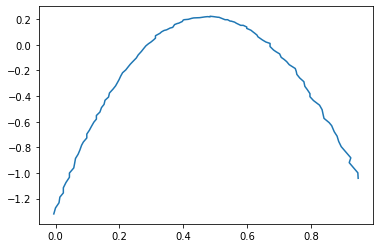

In [ ]:
plt.plot(dado['x'], dado['y'])

## Período de amostragem

In [ ]:
dt = dado['t'].at[2] - dado['t'].at[1]
dt

0.009000000000000001

## Computação da derivada numérica utilizando for

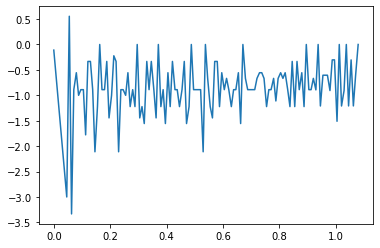

In [ ]:
dxdt_1 = np.zeros(len(dado))
for i in range(len(dado)-1):
  dxdt_1[i] = (dado['x'].at[i+1] 
               - dado['x'].at[i])/dt
plt.plot(dado['t'], dxdt_1)

## Computação da derivada numérica utilizando `np.diff`

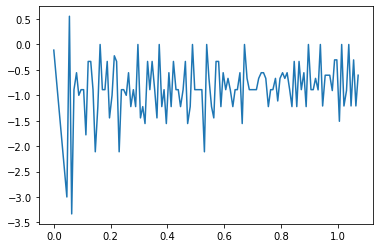

In [ ]:
dxdt_2 = np.diff(dado['x'])/dt
plt.plot(dado['t'].values[0:-1],dxdt_2)

## Computação da derivada numérica com o método das diferenças centrais (`np.gradient`)

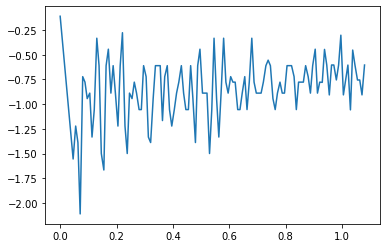

In [ ]:
dxdt_3 = np.gradient(dado['x'], dt)
plt.plot(dado['t'], dxdt_3)

## Cálculo das velocidades e acelerações

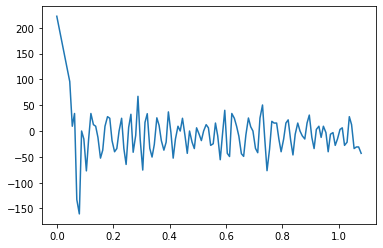

In [ ]:
dxdt = np.gradient(dado['x'], dt)
dydt = np.gradient(dado['y'], dt)
d2xdt2 = np.gradient(dxdt, dt)
d2ydt2 = np.gradient(dydt, dt)

plt.plot(dado['t'], d2ydt2)

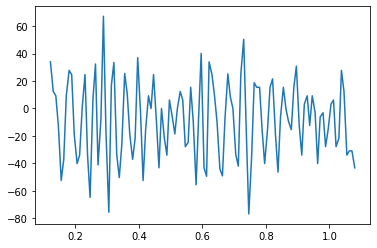

In [ ]:
d2ydt2_cut = d2ydt2[10:]
t_cut = dado['t'].values[10:]
plt.plot(t_cut, d2ydt2_cut)

## Média dos valores da aceleração na direção vertical para estimar a aceleração da gravidade

In [ ]:
np.mean(d2ydt2_cut)

-8.461047254150726

## Média móvel, com for

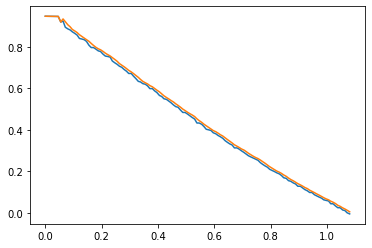

In [ ]:
x_mm = np.zeros(len(dado))
x_mm[0:3] = dado['x'].values[0:3]

for i in range(3, len(dado)):
  x_mm[i] = (dado['x'].at[i] +
             dado['x'].at[i-1] +
             dado['x'].at[i-2] +
             dado['x'].at[i-3])/4

plt.plot(dado['t'], dado['x'])            
plt.plot(dado['t'], x_mm)
# plt.xlim(0.2, 0.4)
# plt.ylim(0.6, 0.8)

(0.6, 0.8)

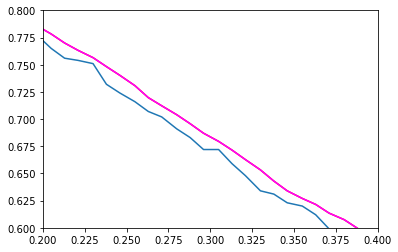

In [ ]:
from scipy.signal import lfilter, filtfilt, butter
b = [0.25, 0.25, 0.25, 0.25]
a = [1, 0, 0, 0]
x_mm_2 = lfilter(b, a, dado['x'])                               
plt.plot(dado['t'], dado['x'])            
plt.plot(dado['t'], x_mm, color='red')
plt.plot(dado['t'], x_mm_2, color='magenta')
plt.xlim(0.2, 0.4)
plt.ylim(0.6, 0.8)

(0.6, 0.8)

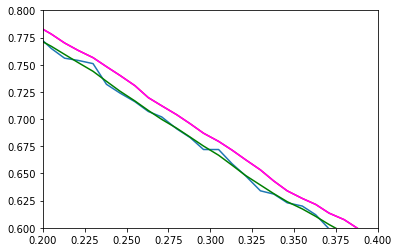

In [ ]:
x_mm_3 = filtfilt(b, a, dado['x'])                               
plt.plot(dado['t'], dado['x'])            
plt.plot(dado['t'], x_mm, color='red')
plt.plot(dado['t'], x_mm_2, color='magenta')
plt.plot(dado['t'], x_mm_3, color='green')
plt.xlim(0.2, 0.4)
plt.ylim(0.6, 0.8)

(-0.4, 0.3)

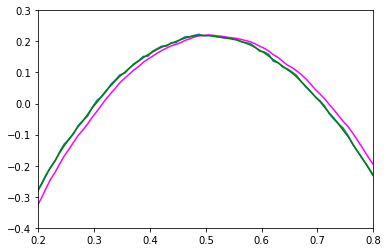

In [ ]:
y_mm_2 = lfilter(b, a, dado['y'])                               
y_mm_3 = filtfilt(b, a, dado['y'])                               
plt.plot(dado['t'], dado['y'])            

plt.plot(dado['t'], y_mm_2, color='magenta')
plt.plot(dado['t'], y_mm_3, color='green')
plt.xlim(0.2, 0.8)
plt.ylim(-0.4, 0.3)

(0.2, 0.3)

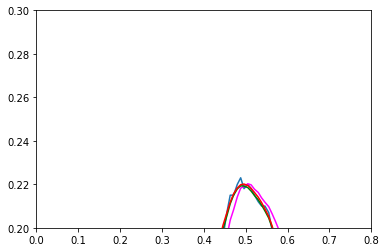

In [ ]:
fc = 10
fs = 1/dt
fn = fs/2
b, a = butter(N=3, Wn=fc/fn)
y_mm_4 = filtfilt(b, a, dado['y']) 
plt.plot(dado['t'], dado['y']) 
plt.plot(dado['t'], y_mm_2, color='magenta')
plt.plot(dado['t'], y_mm_3, color='green')
plt.plot(dado['t'], y_mm_4, color='red')
plt.xlim(0, 0.8)
plt.ylim(0.2, 0.3)                              

-8.206551710522366
-8.107975700568316


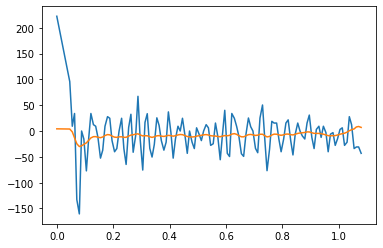

In [ ]:
fc = 5
b, a = butter(N=1, Wn=fc/fn)
x_filtrado = filtfilt(b, a, dado['x']) 
y_filtrado = filtfilt(b, a, dado['y']) 

dxdt_filtrado = np.gradient(x_filtrado, dt)
dydt_filtrado = np.gradient(y_filtrado, dt)
d2xdt2_filtrado = np.gradient(dxdt_filtrado, dt)
d2ydt2_filtrado = np.gradient(dydt_filtrado, dt)

plt.plot(dado['t'], d2ydt2)
plt.plot(dado['t'], d2ydt2_filtrado)
print(d2ydt2_filtrado.mean())
print(d2ydt2.mean())

In [ ]:
!pip install optcutfreq
from optcutfreq import optcutfreq
fc_opt = optcutfreq(dado['y'], freq=fs)
fc_opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


4.945917329281164